In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree



In [2]:
url='https://raw.githubusercontent.com/Alexasald/ddf/refs/heads/main/df_limpio_fi.csv'
df= pd.read_csv(url)
df


,Edad,Genero,Rol,Industria,Años_Expe,Ubicacion,Hrs_semana,Balance_vida_trabajo,Nivel_estres,Salud_Mental,Recurso_SaludM,Cambio_en_productividad,Calificación_aislamientoS,Satisfacción_trabajo,Apoyo_de_empresa,Calidad_del_sueño,Region
0,40,Female,Data Scientist,IT,3,Remote,52,1,Medium,Anxiety,No,Increase,3.0,Satisfied,2,Good,Asia
1,59,Non-binary,Software Engineer,Education,22,Hybrid,46,5,Medium,Anxiety,No,No Change,4.0,Unsatisfied,5,Poor,North America
2,27,Male,Software Engineer,Finance,20,Onsite,32,4,High,Depression,Yes,Increase,3.0,Unsatisfied,3,Poor,Europe
3,49,Male,Sales,Consulting,32,Onsite,35,2,High,Anxiety,Yes,Decrease,3.0,Unsatisfied,3,Average,North America
4,59,Non-binary,Sales,IT,31,Hybrid,39,4,High,Anxiety,No,Increase,5.0,Unsatisfied,1,Average,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,56,Prefer not to say,Software Engineer,Education,5,Hybrid,35,5,Medium,Anxiety,Yes,Increase,2.0,Neutral,5,Average,Asia
5036,41,Prefer not to say,Project Manager,IT,9,Onsite,50,2,High,Anxiety,Yes,No Change,5.0,Neutral,5,Average,Africa
5037,28,Female,Marketing,Retail,5,Onsite,52,4,Low,Burnout,Yes,Increase,1.0,Unsatisfied,1,Poor,Asia
5038,58,Male,Data Scientist,Education,19,Remote,34,2,Medium,Anxiety,No,Decrease,5.0,Satisfied,3,Good,North America


# VISION GENERAL


In [12]:
#Número total de registros y variables
f"{df.shape[0]} filas y {df.shape[1]} columnas"


'5040 filas y 17 columnas'

In [13]:
df.columns

Index(['Edad', 'Genero', 'Rol', 'Industria', 'Años_Expe', 'Ubicacion',
       'Hrs_semana', 'Balance_vida_trabajo', 'Nivel_estres', 'Salud_Mental',
       'Recurso_SaludM', 'Cambio_en_productividad',
       'Calificación_aislamientoS', 'Satisfacción_trabajo', 'Apoyo_de_empresa',
       'Calidad_del_sueño', 'Region'],
      dtype='object')

In [14]:
print(df.isnull().sum())

Edad                         0
Genero                       0
Rol                          0
Industria                    0
Años_Expe                    0
Ubicacion                    0
Hrs_semana                   0
Balance_vida_trabajo         0
Nivel_estres                 0
Salud_Mental                 0
Recurso_SaludM               0
Cambio_en_productividad      0
Calificación_aislamientoS    0
Satisfacción_trabajo         0
Apoyo_de_empresa             0
Calidad_del_sueño            0
Region                       0
dtype: int64


In [15]:
#clasificacion de variables
categoricas=df.select_dtypes(exclude='number')
numericas=df.select_dtypes(include='number')
print("variable categoricas")
print("\nCategorica:Datos que describen un grupo o categorias sin orden")
print(categoricas)
print("variable numericas")
print("\nNumericas:Datos que representan un valor medible o calculable ")
print(numericas)

variable categoricas

Categorica:Datos que describen un grupo o categorias sin orden
                 Genero                Rol      Industria Ubicacion  \
0                Female     Data Scientist             IT    Remote   
1            Non-binary  Software Engineer      Education    Hybrid   
2                  Male  Software Engineer        Finance    Onsite   
3                  Male              Sales     Consulting    Onsite   
4            Non-binary              Sales             IT    Hybrid   
...                 ...                ...            ...       ...   
5035  Prefer not to say  Software Engineer      Education    Hybrid   
5036  Prefer not to say    Project Manager             IT    Onsite   
5037             Female          Marketing         Retail    Onsite   
5038               Male     Data Scientist      Education    Remote   
5039         Non-binary          Marketing  Manufacturing    Onsite   

     Nivel_estres Salud_Mental Recurso_SaludM Cambio_en_produc

Realice cambios en el tipo de datos para que mas adelante se pudiera realizar la estadistica correctamente


In [16]:
df0=df
df0['Edad']=df0['Edad'].astype(float)
df0['Años_Expe']=df0['Años_Expe'].astype(float)
df0['Hrs_semana']=df0['Hrs_semana'].astype(float)
df0['Balance_vida_trabajo']=df0['Balance_vida_trabajo'].astype(float)
df0['Apoyo_de_empresa']=df0['Apoyo_de_empresa'].astype(float)

In [17]:
#Tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       5040 non-null   float64
 1   Genero                     5040 non-null   object 
 2   Rol                        5040 non-null   object 
 3   Industria                  5040 non-null   object 
 4   Años_Expe                  5040 non-null   float64
 5   Ubicacion                  5040 non-null   object 
 6   Hrs_semana                 5040 non-null   float64
 7   Balance_vida_trabajo       5040 non-null   float64
 8   Nivel_estres               5040 non-null   object 
 9   Salud_Mental               5040 non-null   object 
 10  Recurso_SaludM             5040 non-null   object 
 11  Cambio_en_productividad    5040 non-null   object 
 12  Calificación_aislamientoS  5040 non-null   float64
 13  Satisfacción_trabajo       5040 non-null   objec

In [18]:
df.describe()


,Edad,Años_Expe,Hrs_semana,Balance_vida_trabajo,Calificación_aislamientoS,Apoyo_de_empresa
count,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000
mean,41.634325,17.724008,39.537103,2.932341,2.959722,2.992857
std,11.353221,9.762562,11.510619,1.394567,1.382195,1.367103
min,22.000000,1.000000,20.000000,1.000000,1.000000,1.000000
25%,32.000000,9.000000,30.000000,2.000000,2.000000,2.000000
50%,42.000000,17.000000,39.000000,3.000000,3.000000,3.000000
75%,52.000000,26.000000,49.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,5.000000,5.000000,5.000000


In [19]:
df.value_counts()

Edad  Genero             Rol                Industria      Años_Expe  Ubicacion  Hrs_semana  Balance_vida_trabajo  Nivel_estres  Salud_Mental  Recurso_SaludM  Cambio_en_productividad  Calificación_aislamientoS  Satisfacción_trabajo  Apoyo_de_empresa  Calidad_del_sueño  Region       
50.0  Non-binary         Sales              Retail         30.0       Hybrid     27.0        3.0                   Medium        Anxiety       No              No Change                5.0                        Unsatisfied           4.0               Poor               Europe           3
59.0  Prefer not to say  HR                 Finance        1.0        Hybrid     60.0        3.0                   High          Anxiety       No              Increase                 2.0                        Unsatisfied           3.0               Good               South America    3
22.0  Non-binary         Sales              Healthcare     7.0        Remote     35.0        5.0                   Medium        Burnout       No              No Change                5.0                        Neutral               5.0               Average            Asia             2
31.0  Male               Project Manager    IT             33.0       Onsite     37.0        4.0                   High          Anxiety       Yes             No Change                4.0                        Neutral               1.0               Good               North America    2
49.0  Non-binary         Marketing          Consulting     14.0       Hybrid     52.0        3.0                   High          Anxiety       No              No Change                3.0                        Unsatisfied           5.0               Poor               South America    2
                                                                                                                                                                                                                                                                                              ..
35.0  Prefer not to say  Project Manager    Retail         3.0        Remote     21.0        3.0                   Medium        Depression    Yes             Decrease                 3.0                        Unsatisfied           4.0               Poor               North America    1
                                            Healthcare     13.0       Onsite     44.0        3.0                   High          Depression    No              Increase                 2.0                        Neutral               2.0               Average            North America    1
                                            Education      4.0        Onsite     48.0        4.0                   Medium        Burnout       No              No Change                2.0                        Satisfied             2.0               Good               Oceania          1
                         Marketing          Manufacturing  14.0       Hybrid     27.0        2.0                   Low           Depression    Yes             Decrease                 4.0                        Unsatisfied           5.0               Average            Asia             1
60.0  Prefer not to say  Software Engineer  IT             12.0       Hybrid     51.0        2.0                   High          Anxiety       Yes             Decrease                 5.0                        Satisfied             5.0               Good               South America    1
Name: count, Length: 4926, dtype: int64

**RESUMEN ESTADISTICO**

In [20]:
#Resumen estadisticasa descriptivas
df1=df
#variables numericas
n=df.select_dtypes(include='number')
numericas=n.describe().T
numericas['varianza']=n.var()
#variables categoricas
categoricas=df.select_dtypes(exclude='number')
resumencate={col: df[col].value_counts().sort_values(ascending=False ) for col in categoricas}

print("Resumen de variables numericas")
print (numericas)
print ("\nResumen de variables categoricas")
for col,freq in resumencate.items():
  print(f"{col}:\n{freq}\n")


Resumen de variables numericas
                            count       mean        std   min   25%   50%  \
Edad                       5040.0  41.634325  11.353221  22.0  32.0  42.0   
Años_Expe                  5040.0  17.724008   9.762562   1.0   9.0  17.0   
Hrs_semana                 5040.0  39.537103  11.510619  20.0  30.0  39.0   
Balance_vida_trabajo       5040.0   2.932341   1.394567   1.0   2.0   3.0   
Calificación_aislamientoS  5040.0   2.959722   1.382195   1.0   2.0   3.0   
Apoyo_de_empresa           5040.0   2.992857   1.367103   1.0   2.0   3.0   

                            75%   max    varianza  
Edad                       52.0  60.0  128.895626  
Años_Expe                  26.0  35.0   95.307620  
Hrs_semana                 49.0  60.0  132.494356  
Balance_vida_trabajo        4.0   5.0    1.944816  
Calificación_aislamientoS   4.0   5.0    1.910463  
Apoyo_de_empresa            4.0   5.0    1.868971  

Resumen de variables categoricas
Genero:
Genero
Male            

# Visualizacion graficas de variables numericas


**Graficos de variables numericas**

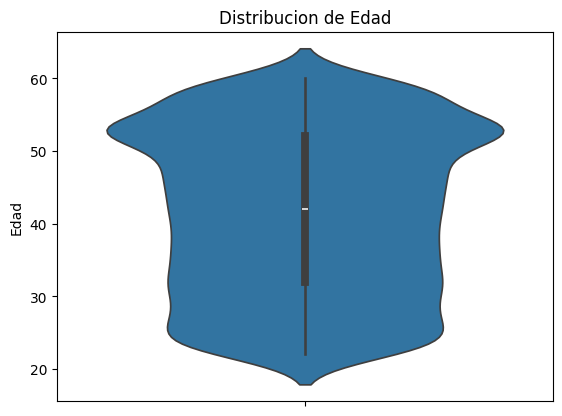

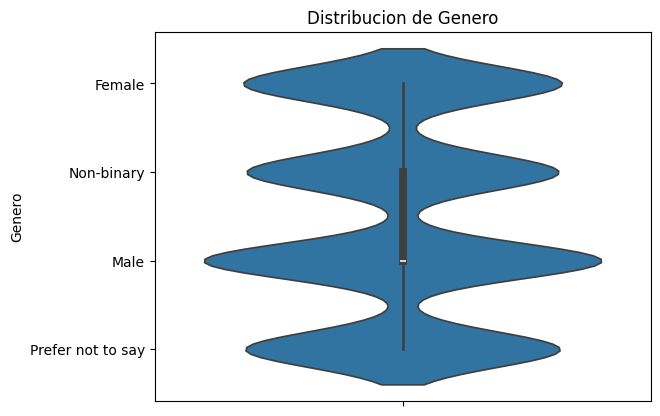

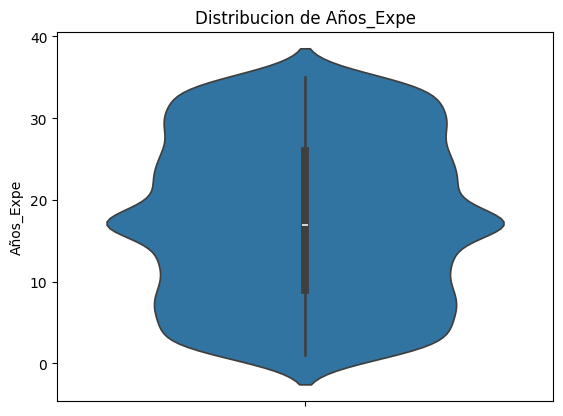

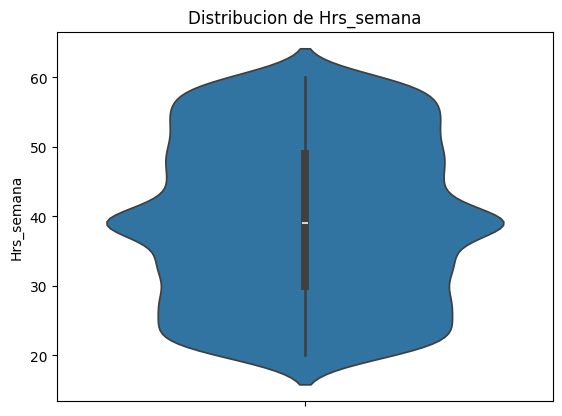

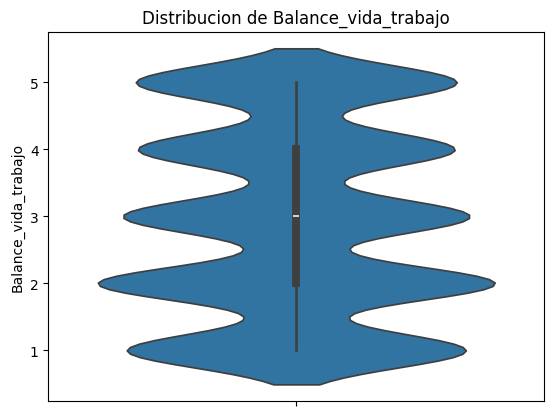

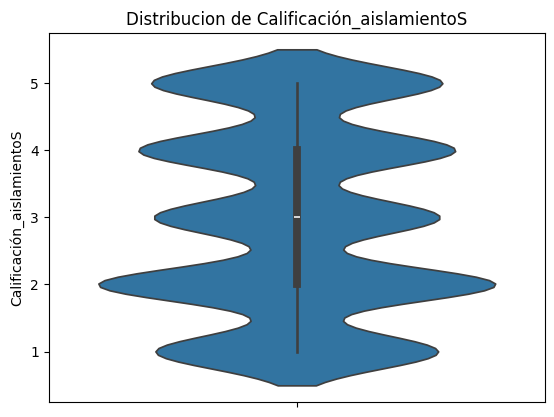

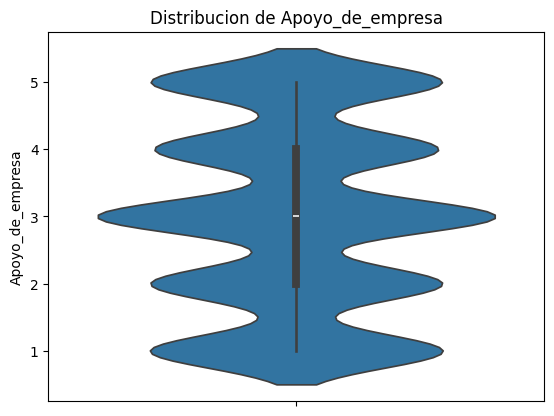

In [21]:
#variables numericas
#graficas de violines
col=['Edad','Genero','Años_Expe','Hrs_semana','Balance_vida_trabajo', 'Calificación_aislamientoS', 'Apoyo_de_empresa']
for i in col:
  sns.violinplot(y=i,data=df)

  plt.title(f'Distribucion de {i}')
  plt.show()

Descripcion.
En este analisis podemos observar:
*   que la media ronda entre los 30 años,siendo personas jovenes quienesabundan en estas modalidades
*   la categoría "femenino" tiene la proporción más alta, seguida de "masculino". Las categorías "no binario" y "prefiero no decir" tienen proporciones más pequeñas.
*  De igual manera muestra que hay un mayor numero de trabajadores con menos años de experiencia, con un conjunto de 20 años o menos.
*Las horas trabajadas por semana son alrededor de 40 horas o menos sin embargo hay una variabilidad considerable de algunas personas trabajando muchas menos horas y otras muchas mas
*  en el balance de vida hay una ligera tendencia reportando un balance similar de cada persona, siedno que la mayoria considera un balance moderadamente bueno




# Graficos de variables categoricas


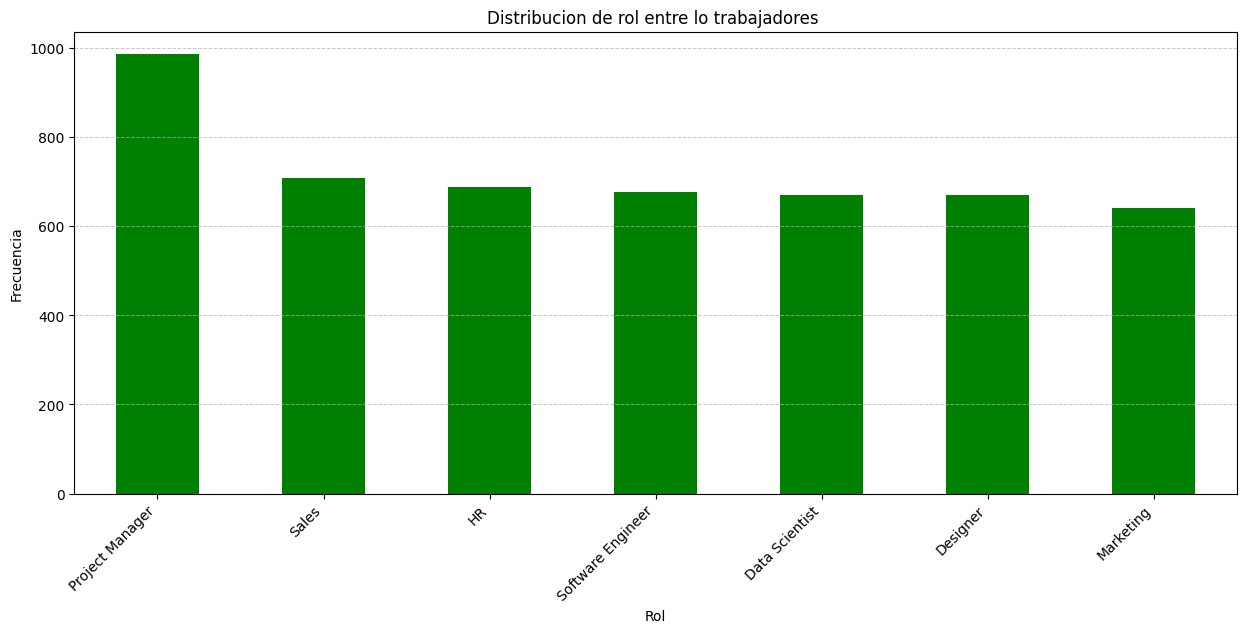

In [22]:
#grafico de rol
plt.figure(figsize=(15, 6))
df['Rol'].value_counts().plot(kind='bar', color='green')
plt.title('Distribucion de rol entre lo trabajadores ')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')


# Rotar las etiquetas del eje X si es necesario
plt.xticks(rotation=45, ha='right')


# Añadir rejilla opcional
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Mostrar el gráfico
plt.show()

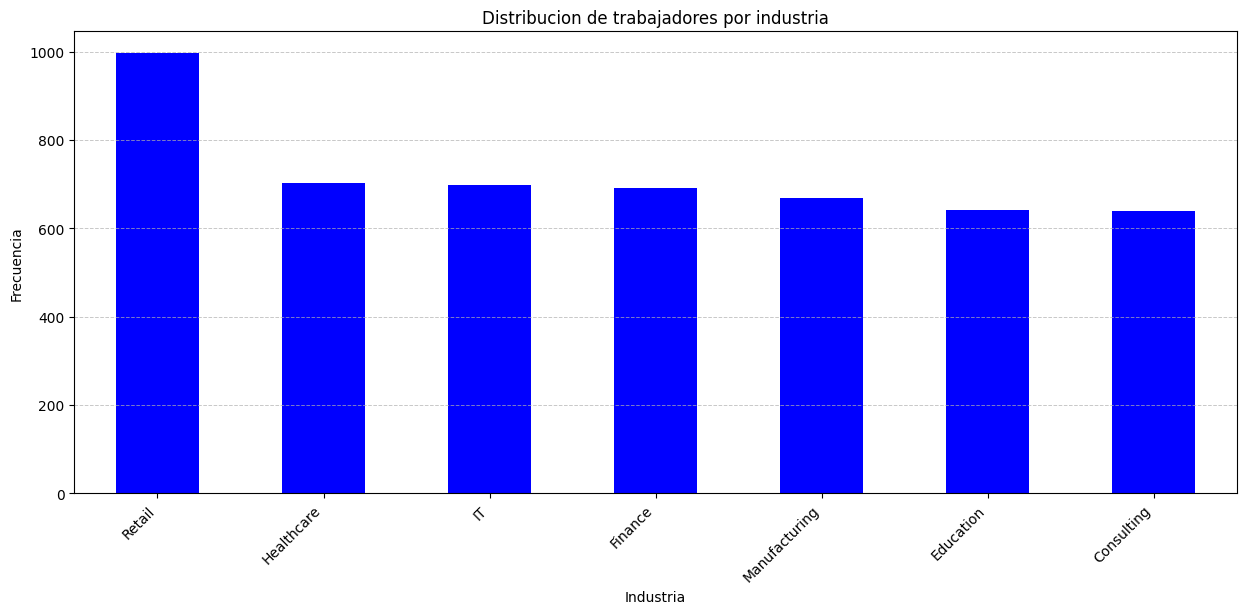

In [23]:
#grafico de industria
plt.figure(figsize=(15, 6))
df['Industria'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribucion de trabajadores por industria')
plt.xlabel('Industria')
plt.ylabel('Frecuencia')


# Rotar las etiquetas del eje X si es necesario
plt.xticks(rotation=45, ha='right')


# Añadir rejilla opcional
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Mostrar el gráfico
plt.show()

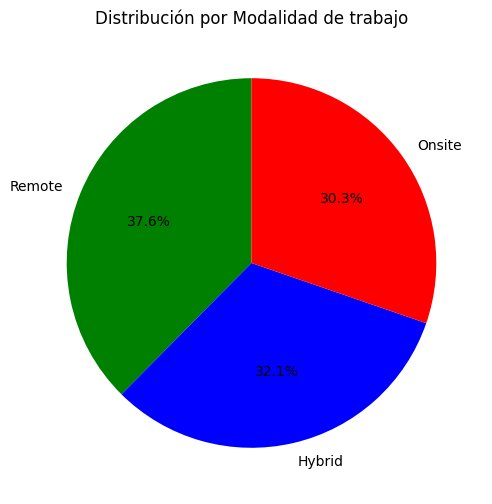

In [24]:
#grafica de ubicacion
gender_counts = df['Ubicacion'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,
         colors=['green','blue','red'])
plt.title('Distribución por Modalidad de trabajo')
plt.show()


<ipython-input-25-c75d1951a6eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Nivel_estres', palette="coolwarm")


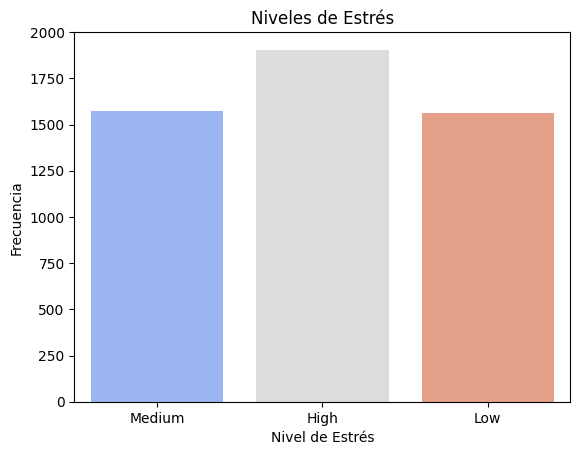

In [25]:
# Gráfico de niveles de Estrés
plt.figure()
sns.countplot(data=df, x='Nivel_estres', palette="coolwarm")
plt.title("Niveles de Estrés")
plt.xlabel("Nivel de Estrés")
plt.ylabel("Frecuencia")
plt.show()

<ipython-input-26-92806029302c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Salud_Mental', palette="coolwarm")


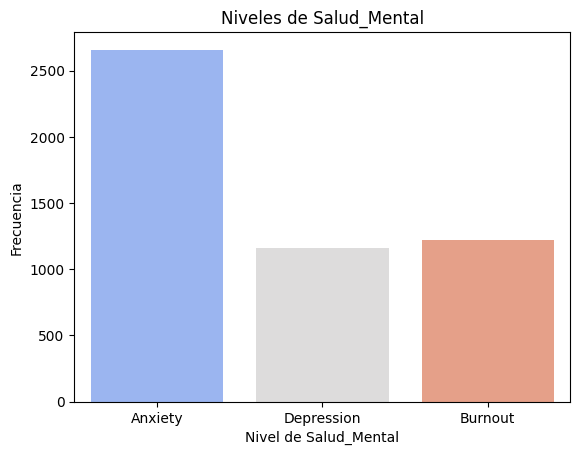

In [26]:
#Salud_Mental
plt.figure()
sns.countplot(data=df, x='Salud_Mental', palette="coolwarm")
plt.title("Niveles de Salud_Mental")
plt.xlabel("Nivel de Salud_Mental")
plt.ylabel("Frecuencia")
plt.show()

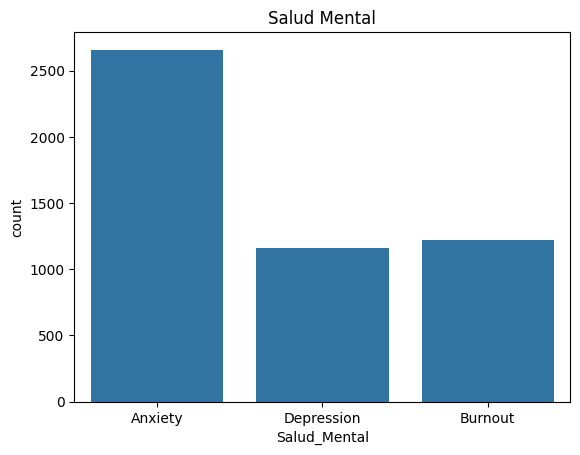

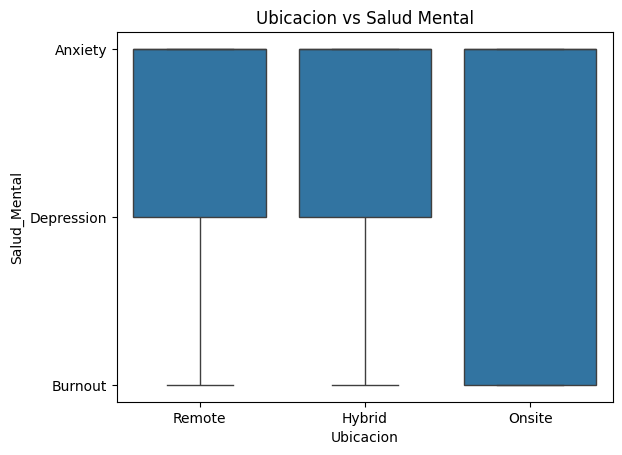

In [27]:
sns.countplot(data=df,x='Salud_Mental')
plt.title('Salud Mental')
plt.show()

sns.boxplot(data=df,x='Ubicacion',y='Salud_Mental')
plt.title('Ubicacion vs Salud Mental')
plt.show()

Descripcion:


*  En ROL existe el dominante de project manajer,obteniendo los demas roles mas equilibrados
*  En industria, Retail tiene un leve predominio, pero esta aun mas balanceado

*   Ubicaacion,hybrid es menos representada, generando un desequilibrio a comparacion de Remote y Onsite que son casi identicas.
*   En niveles de estres Medium y High tienen valores similares y son predominntes, low es siendo un factor comun entre los trabjadores.

*   Salud mental existe un predominio de good mental health sobre poor mental health,sugiriendo un sesgo po
*   Elemento de la lista






#Correlacion entre variables

Cambio de la tipos de variables , de texto a numerico para poder observar si tiene algun tipo de influencia en el analisis, y poder visualizrlo en el mapa de calor


In [28]:
df2=df.copy()
# Asignar valores numéricos a cada categoría de 'Genero'
df2['Genero'] = df2['Genero'].map({'Female': 1, 'Male': 2,'Non-binary':3,'Prefer not to say':4})
df2['Recurso_SaludM'] = df2['Recurso_SaludM'].map({'No': 1, 'Yes': 2})
df2['Ubicacion']=df2['Ubicacion'].map({'Remote':1,'Hybrid':2,'Onsite':3})
df2


,Edad,Genero,Rol,Industria,Años_Expe,Ubicacion,Hrs_semana,Balance_vida_trabajo,Nivel_estres,Salud_Mental,Recurso_SaludM,Cambio_en_productividad,Calificación_aislamientoS,Satisfacción_trabajo,Apoyo_de_empresa,Calidad_del_sueño,Region
0,40.0,1,Data Scientist,IT,3.0,1,52.0,1.0,Medium,Anxiety,1,Increase,3.0,Satisfied,2.0,Good,Asia
1,59.0,3,Software Engineer,Education,22.0,2,46.0,5.0,Medium,Anxiety,1,No Change,4.0,Unsatisfied,5.0,Poor,North America
2,27.0,2,Software Engineer,Finance,20.0,3,32.0,4.0,High,Depression,2,Increase,3.0,Unsatisfied,3.0,Poor,Europe
3,49.0,2,Sales,Consulting,32.0,3,35.0,2.0,High,Anxiety,2,Decrease,3.0,Unsatisfied,3.0,Average,North America
4,59.0,3,Sales,IT,31.0,2,39.0,4.0,High,Anxiety,1,Increase,5.0,Unsatisfied,1.0,Average,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,56.0,4,Software Engineer,Education,5.0,2,35.0,5.0,Medium,Anxiety,2,Increase,2.0,Neutral,5.0,Average,Asia
5036,41.0,4,Project Manager,IT,9.0,3,50.0,2.0,High,Anxiety,2,No Change,5.0,Neutral,5.0,Average,Africa
5037,28.0,1,Marketing,Retail,5.0,3,52.0,4.0,Low,Burnout,2,Increase,1.0,Unsatisfied,1.0,Poor,Asia
5038,58.0,2,Data Scientist,Education,19.0,1,34.0,2.0,Medium,Anxiety,1,Decrease,5.0,Satisfied,3.0,Good,North America


correlacion entre variables, como influyen en el modelo

In [29]:
df2['Genero']=df2['Genero'].astype(float)
df2['Recurso_SaludM']=df2['Recurso_SaludM'].astype(float)
df2['Ubicacion']=df2['Ubicacion'].astype(float)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       5040 non-null   float64
 1   Genero                     5040 non-null   float64
 2   Rol                        5040 non-null   object 
 3   Industria                  5040 non-null   object 
 4   Años_Expe                  5040 non-null   float64
 5   Ubicacion                  5040 non-null   float64
 6   Hrs_semana                 5040 non-null   float64
 7   Balance_vida_trabajo       5040 non-null   float64
 8   Nivel_estres               5040 non-null   object 
 9   Salud_Mental               5040 non-null   object 
 10  Recurso_SaludM             5040 non-null   float64
 11  Cambio_en_productividad    5040 non-null   object 
 12  Calificación_aislamientoS  5040 non-null   float64
 13  Satisfacción_trabajo       5040 non-null   objec

In [30]:
# Matriz de correlacion
df3= df2.copy()[['Edad','Genero','Recurso_SaludM','Años_Expe','Hrs_semana','Balance_vida_trabajo', 'Calificación_aislamientoS', 'Apoyo_de_empresa','Ubicacion',]]
# Calcular la matriz de correlación
cm1 = df3.corr()
cm1

,Edad,Genero,Recurso_SaludM,Años_Expe,Hrs_semana,Balance_vida_trabajo,Calificación_aislamientoS,Apoyo_de_empresa,Ubicacion
Edad,1.000000,0.020205,-0.014047,-0.010886,-0.013769,0.008690,-0.028786,0.022821,0.006059
Genero,0.020205,1.000000,0.018600,-0.001649,0.019960,-0.025943,-0.025772,0.027217,0.016281
Recurso_SaludM,-0.014047,0.018600,1.000000,0.032883,-0.004077,0.001025,0.015085,-0.000657,-0.002837
Años_Expe,-0.010886,-0.001649,0.032883,1.000000,-0.022774,0.011455,0.010442,0.005815,-0.006851
Hrs_semana,-0.013769,0.019960,-0.004077,-0.022774,1.000000,-0.019457,-0.000511,0.006222,0.016906
Balance_vida_trabajo,0.008690,-0.025943,0.001025,0.011455,-0.019457,1.000000,0.000439,-0.008060,-0.014896
Calificación_aislamientoS,-0.028786,-0.025772,0.015085,0.010442,-0.000511,0.000439,1.000000,0.031565,0.008430
Apoyo_de_empresa,0.022821,0.027217,-0.000657,0.005815,0.006222,-0.008060,0.031565,1.000000,-0.015678
Ubicacion,0.006059,0.016281,-0.002837,-0.006851,0.016906,-0.014896,0.008430,-0.015678,1.000000


   

*   Edad se muestra con una relacion debil con el resto de variables, no es un factor determinante, pero con los años de experiencia tiene una logica relacion ya quqe a mayor edas generan mas experiencia

*   Horas semanales y balance vida-trabajo, ligera relacion , mas horas trabajadas suele implicar mejor tiempo para la vida personal.
*   Calificacion de aislamiento y apoyo de la empresa, las personas que se sienten mas aisladas podrian percibir menos apoyo de la empresa.






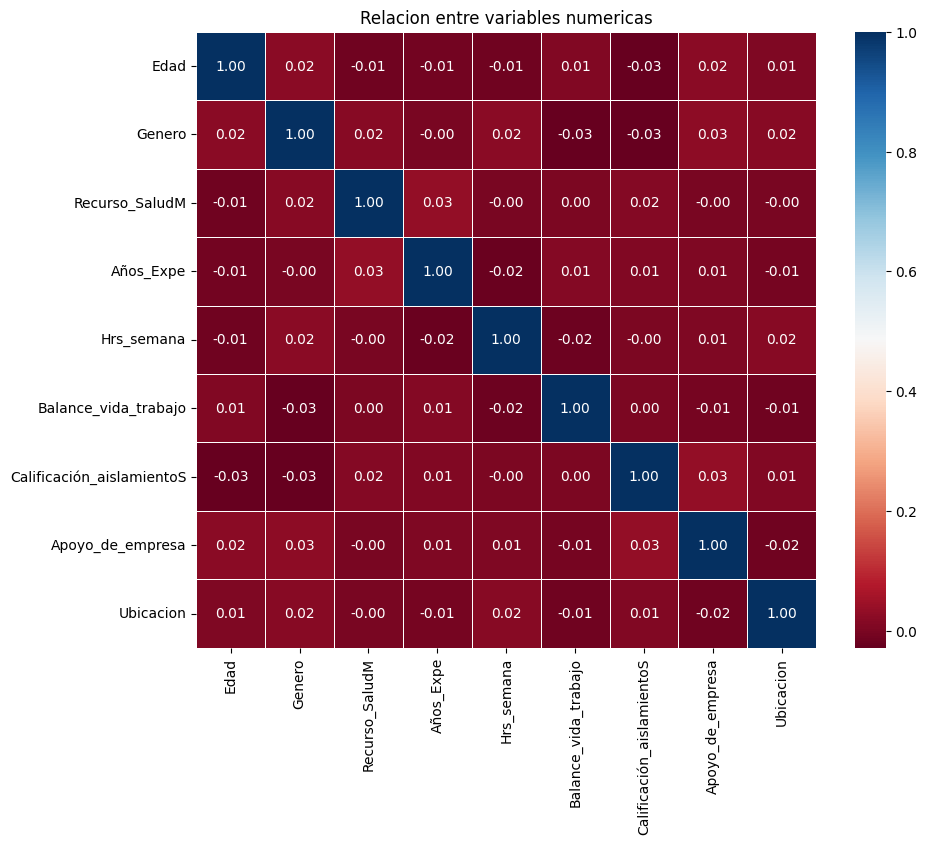

In [31]:
#Headmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm1, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title('Relacion entre variables numericas')
plt.show()

**Parejas de variables**

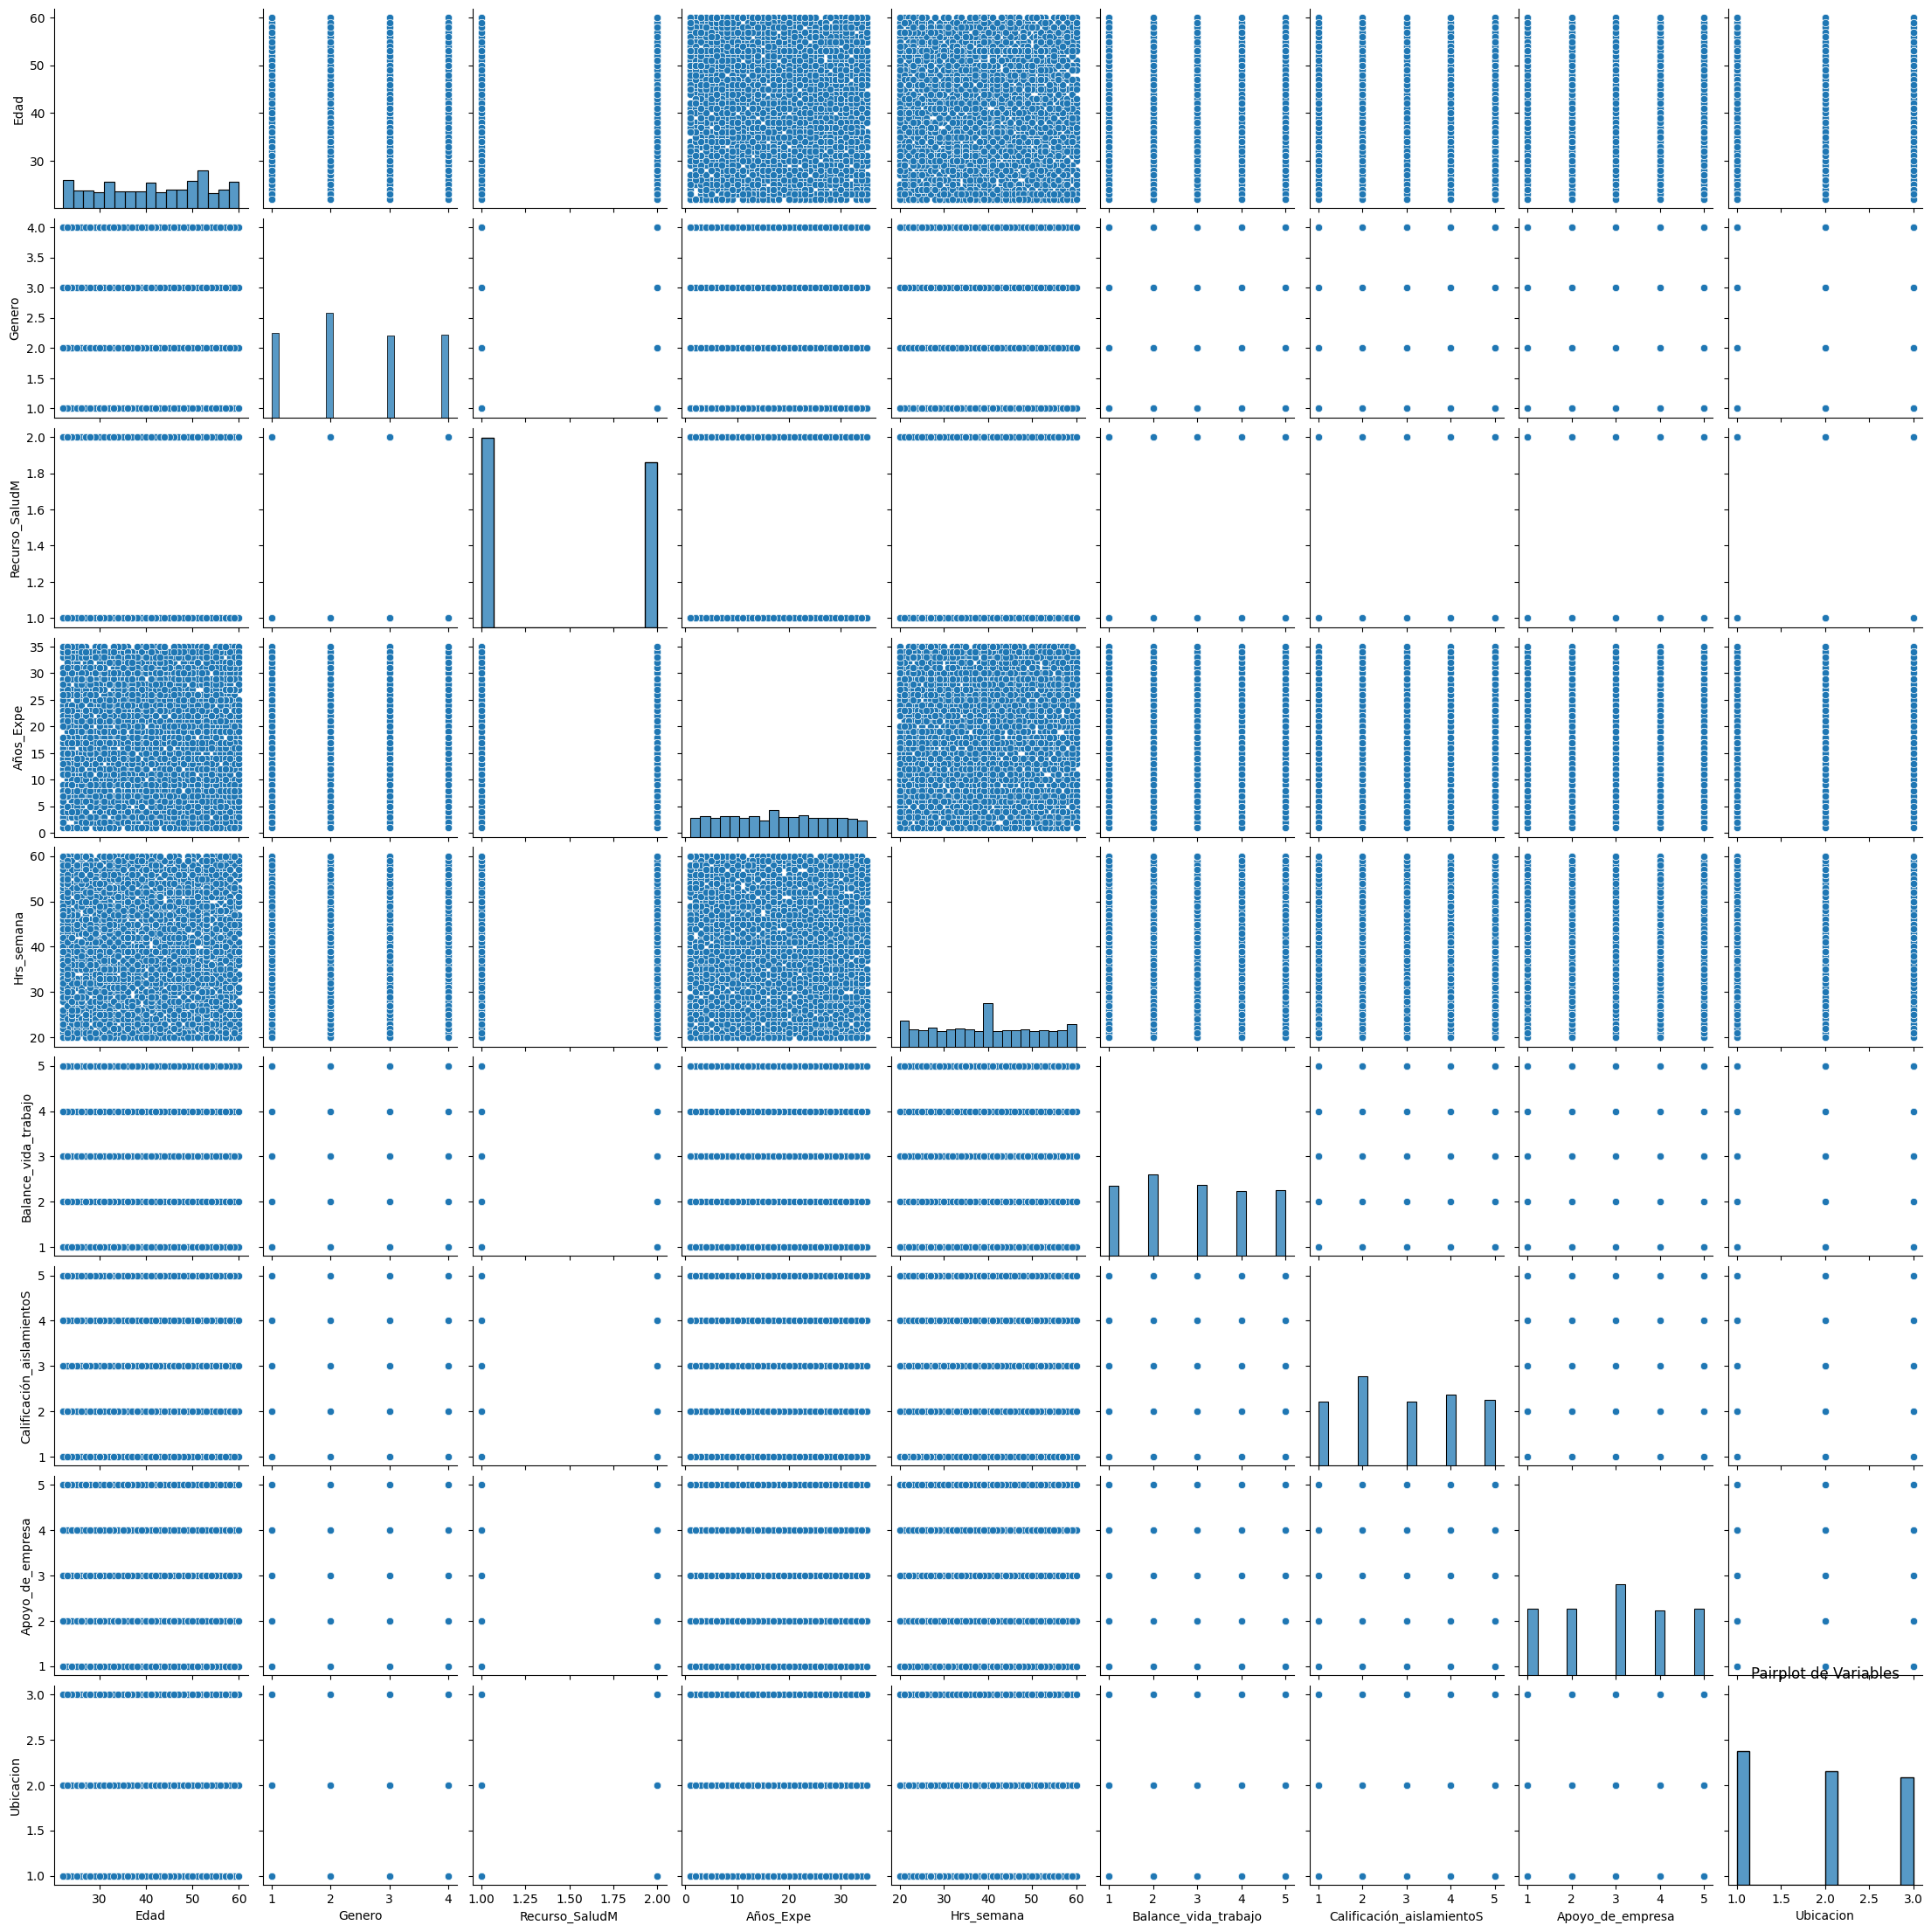

In [32]:
#relacion entre variables
sns.pairplot(df3)
# Mostrar gráfico
plt.title('Pairplot de Variables')
plt.show()

**Correlaciones entre variables**

graficos de dispercion

# Analisis de valores atipicos (outliers)

In [33]:
numericas = df3.select_dtypes(include='number')

# Detectar outliers por IQR
outliers = {}
for col in numericas.columns:
    Q1 = numericas[col].quantile(0.25)
    Q3 = numericas[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2* IQR
    upper_bound = Q3 + 2 * IQR
    outliers[col] = numericas[(numericas[col] < lower_bound) | (numericas[col] > upper_bound)][col]

# Mostrar columnas con outliers detectados
for col, vals in outliers.items():
    print(f"Outliers detectados en '{col}': {len(vals)} valores")

Outliers detectados en 'Edad': 0 valores
Outliers detectados en 'Genero': 0 valores
Outliers detectados en 'Recurso_SaludM': 0 valores
Outliers detectados en 'Años_Expe': 0 valores
Outliers detectados en 'Hrs_semana': 0 valores
Outliers detectados en 'Balance_vida_trabajo': 0 valores
Outliers detectados en 'Calificación_aislamientoS': 0 valores
Outliers detectados en 'Apoyo_de_empresa': 0 valores
Outliers detectados en 'Ubicacion': 0 valores


Sin datos atipicos encontrados.

# Analisis de valores faltantes

In [34]:
#visualizar datos faltantes
faltantes = df3.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:")
print(faltantes)


Porcentaje de valores faltantes por columna:
Edad                         0.0
Genero                       0.0
Recurso_SaludM               0.0
Años_Expe                    0.0
Hrs_semana                   0.0
Balance_vida_trabajo         0.0
Calificación_aislamientoS    0.0
Apoyo_de_empresa             0.0
Ubicacion                    0.0
dtype: float64


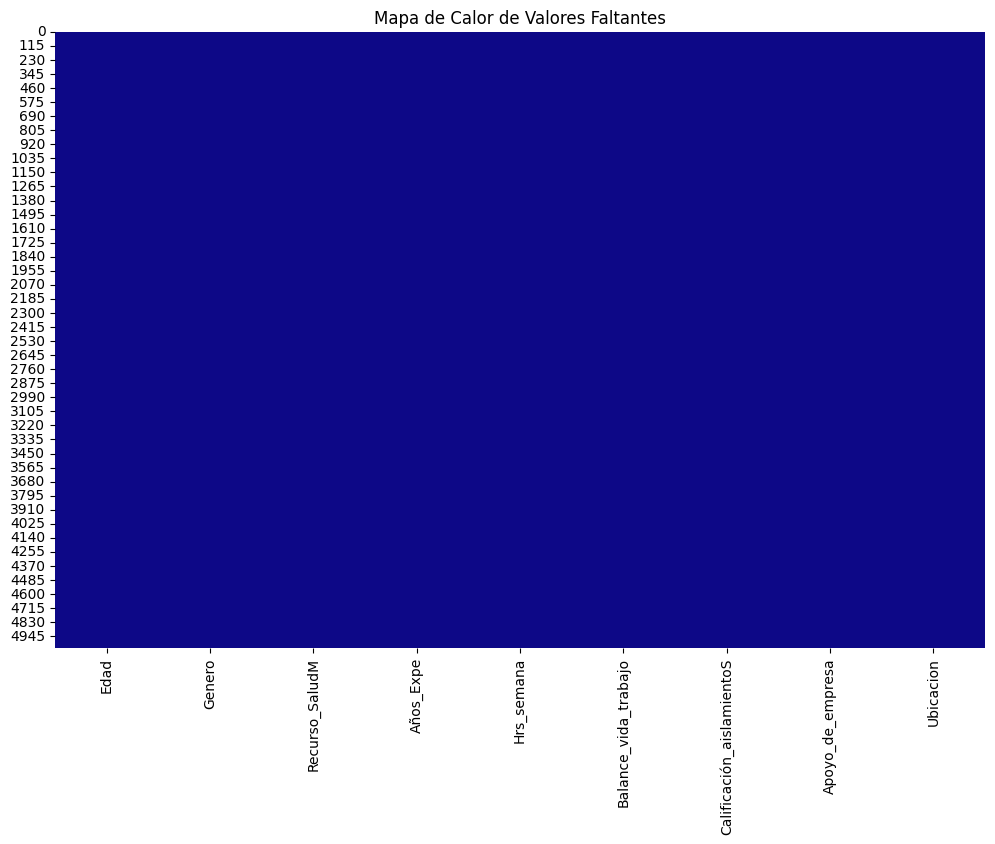

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df3.isnull(), cbar=False, cmap='plasma')
plt.title("Mapa de Calor de Valores Faltantes")
plt.show()


Como se noto en la tabla y en el mapa de calor, no existen datos faltantes

# Relacion entre variables categoricas y numericas

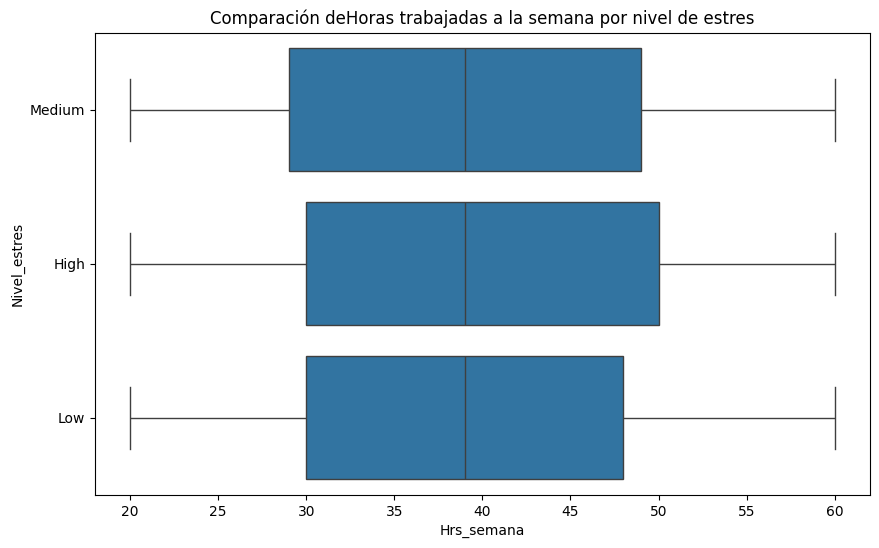

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hrs_semana', y='Nivel_estres', data=df2.copy())
plt.title("Comparación deHoras trabajadas a la semana por nivel de estres")
plt.show()

La mediana de las horas trabajadas parece ser ligeramente más alta para el nivel de estrés medio, en comparación con los niveles bajo y alto. Esto indicaría que, en promedio, las personas que reportan un nivel de estrés medio trabajan más horas a la semana.

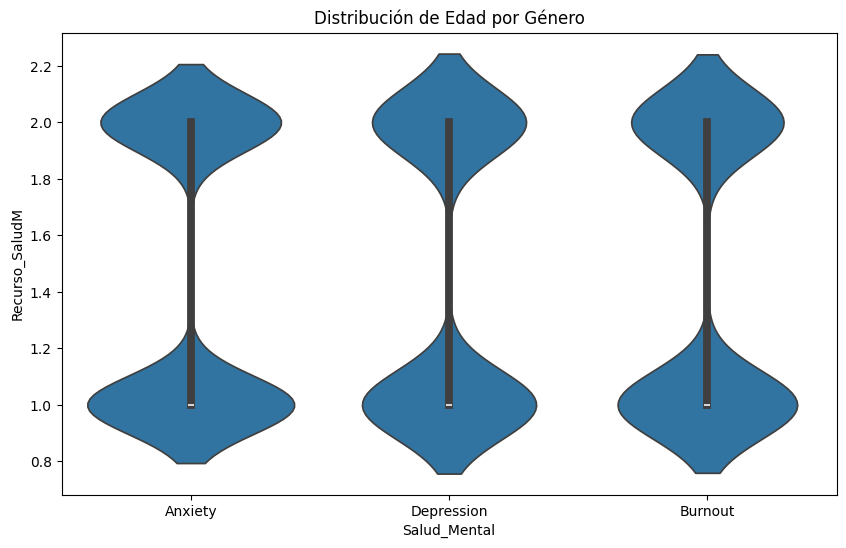

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Salud_Mental', y='Recurso_SaludM', data=df2.copy())
plt.title("Distribución de Edad por Género")
plt.show()


Los tres grupos (ansiedad, depresión y burnout) parecen tener una distribución similar sugiere que la concentración de los datos es similar en cada grupo aunque podría haber ligeras variaciones que no son tan evidentes a simple vista

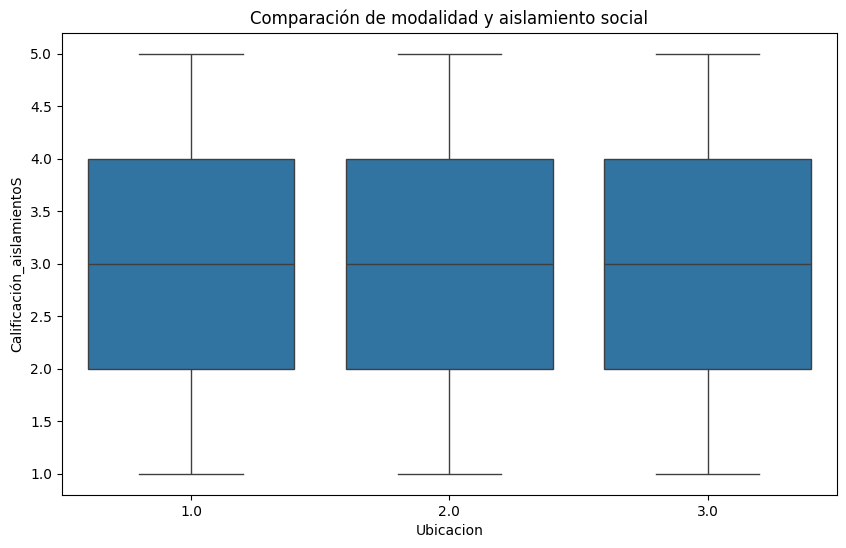

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ubicacion', y='Calificación_aislamientoS', data=df2.copy())
plt.title("Comparación de modalidad y aislamiento social")
plt.show()

tienen una longitud similar y las medianas se encuentran aproximadamente en el mismo punto a lo largo del eje Y. Esto indica que la distribución de la calificación de aislamiento social es bastante similar en las tres modalidades.

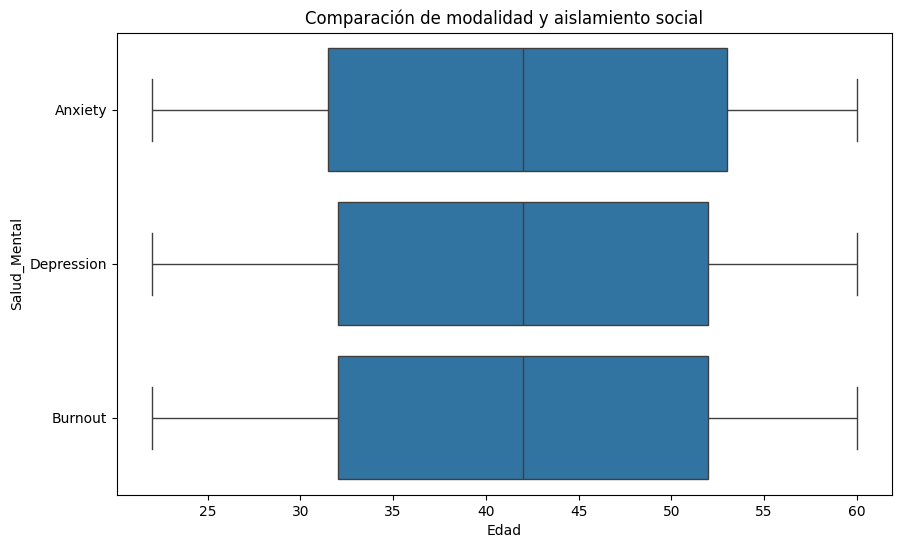

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Edad', y='Salud_Mental', data=df2.copy())
plt.title("Comparación de modalidad y aislamiento social")
plt.show()

Podemos notar que no hay mucha diferencia entre los analisis de variables categoricas y numericas,tomemos en cuenta en cuenta que la mayoria de variables tienen datos repetidos, ya que al analizar comportamientos similares, las respuestas suelen ser las miamas, apesar de que los transtornos no siempre se comportan igual en cada indiviuduo, podemos notar que en el ambito laboral se esta mostrando de manera casi identica.

# Modelo Random Forest Classifier

Modelo elegido**: ”Random Forest Classifier”**
Justificación: El modelo puede identificar cuales variables tienen mayor peso en la predicción de la salud mental en base a la modalidad de trabajo. Esto permitirá si realmente la ubicación tiene algun impacto significativo con las demás variables ¿.
Es mas resistente al sobreajuste, especialmente por la gran cantidad de números, ya que, al analizar por región, la cantidad puede crecer en un futuro. El objetivo es poder brindar ayuda a aquellas personas que trabajen a distancia, ellos estando en su mayoría en lugares no fijo hace que el registro de cada uno de ellos llegue a ser muy robusto.



In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # Para clasificación
from sklearn.ensemble import RandomForestRegressor  # Para regresión
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # Para clasificación
from sklearn.metrics import mean_squared_error  # Para regresión
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [43]:
df4=df2.copy()
df4['Rol']=df4['Rol'].map({'Data Scientist':1,'Software Engineer':2,'Sales':3, 'Marketing':4,'Designer':5,'Project Manager':6,'HR':7})
df4['Industria']=df4['Industria'].map({'IT':1,'Education':2,'Finance':3, 'Consulting':4,'Manufacturing':5,'Healthcare':6,'Retail':7})
df4['Calidad_del_sueño']=df4['Calidad_del_sueño'].map({'Good':1,'Poor':2,'Average':3})
df4['Salud_Mental']=df4['Salud_Mental'].map({'Anxiety':1,'Depression':2,'Burnout':3})
df4['Nivel_estres']=df4['Nivel_estres'].map({'Low':1,'Medium':2,'High':3})
df4


,Edad,Genero,Rol,Industria,Años_Expe,Ubicacion,Hrs_semana,Balance_vida_trabajo,Nivel_estres,Salud_Mental,Recurso_SaludM,Cambio_en_productividad,Calificación_aislamientoS,Satisfacción_trabajo,Apoyo_de_empresa,Calidad_del_sueño,Region
0,40.0,1.0,1,1,3.0,1.0,52.0,1.0,2,1,1.0,Increase,3.0,Satisfied,2.0,1,Asia
1,59.0,3.0,2,2,22.0,2.0,46.0,5.0,2,1,1.0,No Change,4.0,Unsatisfied,5.0,2,North America
2,27.0,2.0,2,3,20.0,3.0,32.0,4.0,3,2,2.0,Increase,3.0,Unsatisfied,3.0,2,Europe
3,49.0,2.0,3,4,32.0,3.0,35.0,2.0,3,1,2.0,Decrease,3.0,Unsatisfied,3.0,3,North America
4,59.0,3.0,3,1,31.0,2.0,39.0,4.0,3,1,1.0,Increase,5.0,Unsatisfied,1.0,3,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,56.0,4.0,2,2,5.0,2.0,35.0,5.0,2,1,2.0,Increase,2.0,Neutral,5.0,3,Asia
5036,41.0,4.0,6,1,9.0,3.0,50.0,2.0,3,1,2.0,No Change,5.0,Neutral,5.0,3,Africa
5037,28.0,1.0,4,7,5.0,3.0,52.0,4.0,1,3,2.0,Increase,1.0,Unsatisfied,1.0,2,Asia
5038,58.0,2.0,1,2,19.0,1.0,34.0,2.0,2,1,1.0,Decrease,5.0,Satisfied,3.0,1,North America


In [44]:
df5=df4

Al realizar el cambio de variable a numerico, tome la decision de elimar ciertas columnas para facilitar el trabajo del analsiis y poder ser mas concreto con las variables que me podrian ayudar al abordar las estrategias

In [45]:
df5.drop(columns=['Cambio_en_productividad', 'Satisfacción_trabajo','Region',],inplace=True)
df5


,Edad,Genero,Rol,Industria,Años_Expe,Ubicacion,Hrs_semana,Balance_vida_trabajo,Nivel_estres,Salud_Mental,Recurso_SaludM,Calificación_aislamientoS,Apoyo_de_empresa,Calidad_del_sueño
0,40.0,1.0,1,1,3.0,1.0,52.0,1.0,2,1,1.0,3.0,2.0,1
1,59.0,3.0,2,2,22.0,2.0,46.0,5.0,2,1,1.0,4.0,5.0,2
2,27.0,2.0,2,3,20.0,3.0,32.0,4.0,3,2,2.0,3.0,3.0,2
3,49.0,2.0,3,4,32.0,3.0,35.0,2.0,3,1,2.0,3.0,3.0,3
4,59.0,3.0,3,1,31.0,2.0,39.0,4.0,3,1,1.0,5.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,56.0,4.0,2,2,5.0,2.0,35.0,5.0,2,1,2.0,2.0,5.0,3
5036,41.0,4.0,6,1,9.0,3.0,50.0,2.0,3,1,2.0,5.0,5.0,3
5037,28.0,1.0,4,7,5.0,3.0,52.0,4.0,1,3,2.0,1.0,1.0,2
5038,58.0,2.0,1,2,19.0,1.0,34.0,2.0,2,1,1.0,5.0,3.0,1


In [46]:
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       5040 non-null   float64
 1   Genero                     5040 non-null   float64
 2   Rol                        5040 non-null   int64  
 3   Industria                  5040 non-null   int64  
 4   Años_Expe                  5040 non-null   float64
 5   Ubicacion                  5040 non-null   float64
 6   Hrs_semana                 5040 non-null   float64
 7   Balance_vida_trabajo       5040 non-null   float64
 8   Nivel_estres               5040 non-null   int64  
 9   Salud_Mental               5040 non-null   int64  
 10  Recurso_SaludM             5040 non-null   float64
 11  Calificación_aislamientoS  5040 non-null   float64
 12  Apoyo_de_empresa           5040 non-null   float64
 13  Calidad_del_sueño          5040 non-null   int64

In [89]:
# Dividir en características (X) y objetivo (y)
X = df5.drop('Ubicacion', axis=1)
y = df5['Salud_Mental']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

La variable x contiene todas las columnas excepto la columna de ubicacion,para poder predecir la variable objetivo.
Por otro lado, la variable Y es aquella que se quiere predecir , es el objetivo.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42):1 Divide los datos en cuatro conjuntos:
X_train: Características del conjunto de entrenamiento.
X_test: Características del conjunto de prueba.
y_train: Valores de la variable objetivo del conjunto de entrenamiento.
y_test: Valores de la variable objetivo del conjunto de prueba.
test_size=0.3: Indica que el 30% de los datos se utilizará para el conjunto de prueba y el 70% restante para el conjunto de entrenamiento.
random_state=42: Fija una semilla aleatoria para garantizar que la división de los datos sea reproducible.

In [92]:
# Entrenar un modelo Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Métricas de evaluación
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[791   0   0]
 [  0 338   0]
 [  0   0 383]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       791
           2       1.00      1.00      1.00       338
           3       1.00      1.00      1.00       383

    accuracy                           1.00      1512
   macro avg       1.00      1.00      1.00      1512
weighted avg       1.00      1.00      1.00      1512



rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10): Crea un objeto de la clase RandomForestClassifier con los siguientes parámetros:
random_state=42: Fija una semilla aleatoria para garantizar que los resultados sean reproducibles.
n_estimators=100: Especifica el número de árboles en el bosque aleatorio (100 en este caso).
max_depth=10: Establece la profundidad máxima de cada árbol en el bosque (10 niveles).
rf.fit(X_train, y_train): Entrena el modelo de Random Forest utilizando los datos de entrenamiento X_train (características) y y_train (etiquetas).
Predicciones:

y_pred = rf.predict(X_test): Utiliza el modelo entrenado para hacer predicciones sobre el conjunto de prueba X_test. Las predicciones se almacenan en la variable y_pred.
Evaluación del modelo:

**el modelo tiene un rendimiento excelente, con una precisión, recall y F1-score de 1.00 para todas las clases. Esto significa que el modelo está clasificando correctamente todos los ejemplos en el conjunto de prueba.**

Características más importantes:
Salud_Mental: 0.8732
Hrs_semana: 0.0192
Años_Expe: 0.0181
Edad: 0.0175
Rol: 0.0117
Industria: 0.0103
Calificación_aislamientoS: 0.0096
Balance_vida_trabajo: 0.0092
Apoyo_de_empresa: 0.0091
Genero: 0.0072
Calidad_del_sueño: 0.0063
Nivel_estres: 0.0053
Recurso_SaludM: 0.0033


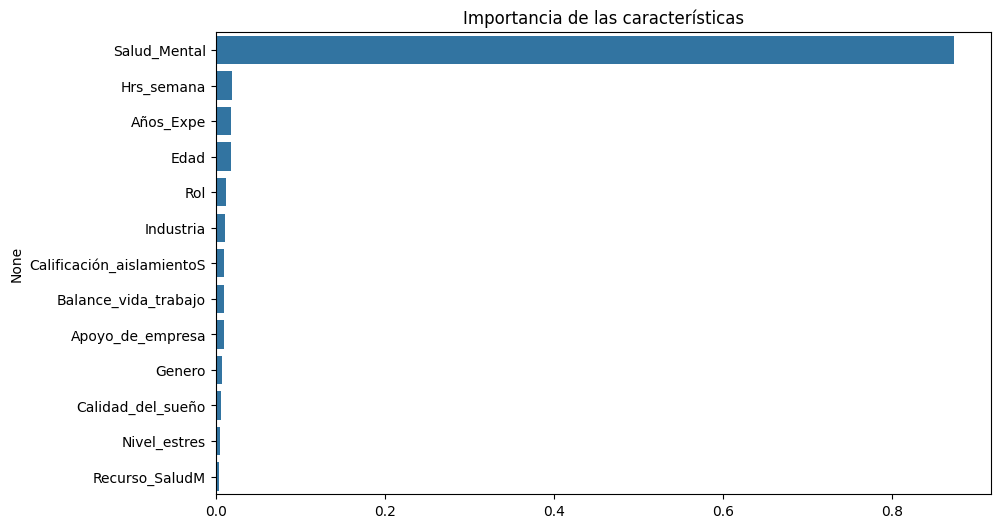

In [93]:
# Importancia de las características
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

print("Características más importantes:")
for i in indices:
    print(f"{features[i]}: {importances[i]:.4f}")

# Visualización de las importancias
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Importancia de las características")
plt.show()

Obtener las importancias de las características: Utiliza el atributo feature_importances_ del modelo de Random Forest para obtener un arreglo con la importancia de cada característica.
Ordenar las características: Ordena las características de mayor a menor importancia utilizando np.argsort.

El modelo de Random Forest considera que la "Salud Mental" es el factor más importante para realizar las predicciones.
Otras características como "Hrs_semana", "Años_Expe" y "Edad" también tienen una influencia significativa.
Características como "Apoyo de empresa" y "Género" parecen tener una influencia menor en las predicciones.


In [70]:
# Definir los parámetros para ajustar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Búsqueda de cuadrícula
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo
print("Mejores parámetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluación con el mejor modelo
y_pred_best = best_model.predict(X_test)
print("\nReporte de Clasificación con Modelo Optimizado:")
print(classification_report(y_test, y_pred_best))

Mejores parámetros: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}

Reporte de Clasificación con Modelo Optimizado:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       791
           2       1.00      1.00      1.00       338
           3       1.00      1.00      1.00       383

    accuracy                           1.00      1512
   macro avg       1.00      1.00      1.00      1512
weighted avg       1.00      1.00      1.00      1512



Una vez encontrado el mejor conjunto de parámetros, se evalúa el modelo en un conjunto de datos de prueba y se presentan los resultados.

Ajuste de hiperparámetros: Se busca la mejor configuración para el modelo.
Validación cruzada: Se evalúa el modelo de forma más robusta para evitar el sobreajuste.
Mejores parámetros: Se identifica la mejor combinación de parámetros.
Evaluación: Se mide el rendimiento del modelo en un conjunto de datos independiente.

Precisión, Recall y F1-score de 1.00 para todas las clases: Esto indica que el modelo ha clasificado correctamente todos los ejemplos en el conjunto de prueba. Es decir, el modelo es capaz de distinguir perfectamente entre las diferentes clases.
 En este caso, vemos que hay un desbalance en las clases, ya que la clase 1 tiene más ejemplos que las otras. Sin embargo, el modelo ha logrado obtener rendimiento perfecto incluso en este escenario.
Métricas promedio: Tanto el promedio ponderado como el promedio macro de las métricas también son de 1.00, lo que refuerza la idea de que el modelo tiene un desempeño excepcional.
Interpretación:

Modelo altamente preciso: El modelo de Random Forest, con los parámetros ajustados mediante búsqueda por cuadrícula, ha logrado un rendimiento perfecto en la tarea de clasificación.

In [94]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=5)
print("Puntajes de validación cruzada:", scores)
print("Precisión promedio:", scores.mean())

Puntajes de validación cruzada: [1. 1. 1. 1. 1.]
Precisión promedio: 1.0


REGRESION LINEAL

In [136]:
# Calcular el coeficiente de correlación de Pearson
correlacion_pearson = df5['Ubicacion'].corr(df5['Salud_Mental'], method='pearson')

print(f"Coeficiente de correlación de Pearson: {correlacion_pearson}")

Coeficiente de correlación de Pearson: 0.020968254651003226


In [141]:
X = df5[[ 'Ubicacion']]
y = df5['Salud_Mental']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=42)

In [142]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

In [144]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

Error   cuadrático medio: 0.7115893696663909


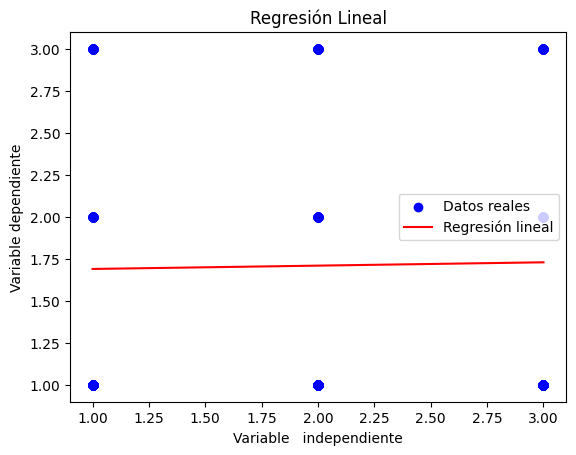

In [145]:
# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Regresión lineal')
plt.xlabel('Variable   independiente')
plt.ylabel('Variable dependiente')
plt.legend()
plt.title('Regresión Lineal')
plt.show()